# ASTROPLAN usage 
Determining if my Brown Dwarf targets are visible from GIANO
September 2016


In [48]:
import astroplan
from astroplan import Observer
from astroplan import FixedTarget
from astropy.time import Time
from astroplan.plots import plot_airmass 
import matplotlib.pyplot as plt 
import numpy as np
import astropy.coordinates as coords


In [49]:
#from astroplan import download_IERS_A
#download_IERS_A()


In [56]:
Period_times = ["2017-04-05 00:00:00", "2017-07-01 00:00:00", "2017-10-25 00:00:00"]   # start, middle, end

# Add your Targets here
Targets = ["GJ 505A", "GJ 107A", "GJ 107B", "GJ 505B"]

# Change this to Carmenes
#carmenes = Observer.at_site("roque de los Muchachos") # Add calar alto to astropy
# an nz observatory? mount john
giano = Observer.at_site("roque de los Muchachos")

coords.EarthLocation.get_site_names()

['Anglo-Australian Observatory',
 'Apache Point',
 'Apache Point Observatory',
 'BAO',
 'Beijing XingLong Observatory',
 'Black Moshannon Observatory',
 'Canada-France-Hawaii Telescope',
 'Catalina Observatory',
 'Cerro Pachon',
 'Cerro Paranal',
 'Cerro Tololo',
 'Cerro Tololo Interamerican Observatory',
 'Dominion Astrophysical Observatory',
 'Gemini South',
 'Hale Telescope',
 'Haleakala Observatories',
 'Keck Observatory',
 'Kitt Peak',
 'Kitt Peak National Observatory',
 'La Silla Observatory',
 'Large Binocular Telescope',
 'Las Campanas Observatory',
 'Lick Observatory',
 'Lowell Observatory',
 'Manastash Ridge Observatory',
 'McDonald Observatory',
 'Medicina',
 'Medicina Dish',
 'Michigan-Dartmouth-MIT Observatory',
 'Mount Graham International Observatory',
 'Mt Graham',
 'Mt. Ekar 182 cm. Telescope',
 'Mt. Stromlo Observatory',
 'Multiple Mirror Telescope',
 'NOV',
 'National Observatory of Venezuela',
 'Noto',
 'Observatorio Astronomico Nacional, San Pedro Martir',
 'Observ

In [42]:
for T in Period_times:
    # Analyse each target at this time.
    time = Time(T)
    print("Start new calculation")
    print("Date = {}".format(T))
    sunset_time = giano.sun_set_time(time, which='nearest')
    sunrise_time = giano.sun_rise_time(time, which='nearest')
    print("Sunset time = {}".format(sunset_time.iso))
    print("Sunrise time = {}".format(sunrise_time.iso))
   
    #for Target in Targets:
    for Target in Targets: 
        #During this time determine if this target is up and observable
        target = FixedTarget.from_name(Target)
        target_rise = giano.target_rise_time(time, target)
        target_set = giano.target_set_time(time, target)
        target_meridian = giano.target_meridian_transit_time(time, target)
        # Calculate when they are up at night time
        # I just plotted the airmass and used that as a guide for targets.
        
        plot_airmass(target, giano, time)
        
    plt.legend(loc=0)
    plt.show()
                

Start new calculation
Date = 2017-04-05 00:00:00
Sunset time = 2017-04-04 19:27:33.294
Sunrise time = 2017-04-05 07:00:35.705


/home/jneal/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/projections/polar.py:65: RuntimeWarning: invalid value encountered in less
  mask = r < 0


ValueError: DateFormatter found a value of x=0, which is an illegal date.  This usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

# Use plot_sky
to plot the motions over each night


Start new calculation
Date = 2017-04-05 00:00:00
Sunset time = 2017-04-04 19:27:33.294
Sunrise time = 2017-04-05 07:00:35.705


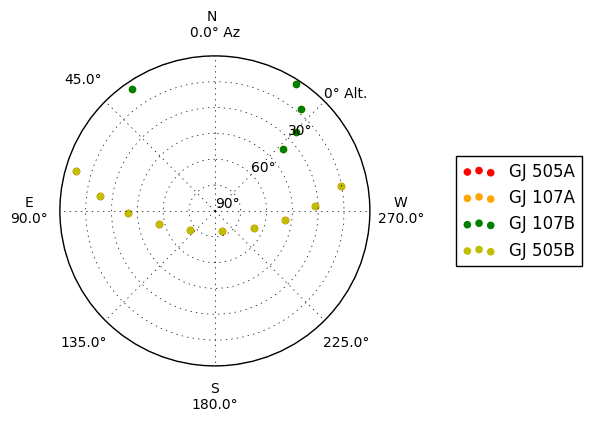

Start new calculation
Date = 2017-07-01 00:00:00
Sunset time = 2017-06-30 20:09:29.660
Sunrise time = 2017-07-01 06:21:15.169


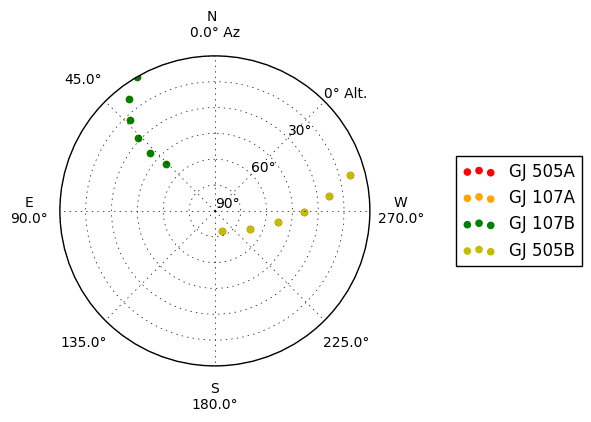

Start new calculation
Date = 2017-10-25 00:00:00


Sunset time = 2017-10-24 18:28:51.046
Sunrise time = 2017-10-25 07:22:50.840


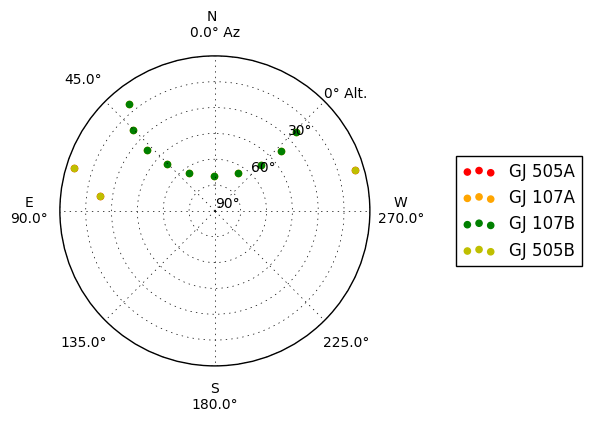

In [55]:
from astroplan.plots import plot_sky

all_styles = ['r', 'orange', 'g', 'y', 'm', 'c', 'b', 'k']
styles = all_styles[:len(Targets)]

for T in Period_times:
    # Analyse each target at this time.
    time = Time(T)
    print("Start new calculation")
    print("Date = {}".format(T))
    sunset_time = giano.sun_set_time(time, which='nearest')
    sunrise_time = giano.sun_rise_time(time, which='nearest')
    print("Sunset time = {}".format(sunset_time.iso))
    print("Sunrise time = {}".format(sunrise_time.iso))
    
    time_window = sunset_time + (sunrise_time - sunset_time) * np.linspace(0, 1, 10)
    
    for Target, style in zip(Targets, styles):
        target_style = {'color': style}
        target = FixedTarget.from_name(Target)
        plot_sky(target, giano, time_window, style_kwargs=target_style)  

    plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))  
    plt.show() 

From this it shows that the targets are better to observe in the latter part of the observation run.
The three plots are for the begining middle and end.
None of that targets get very high though